<a href="https://colab.research.google.com/github/BrendaChepkoech/-Fraud-Detection-in-Electricity-and-Gas-Consumption/blob/main/Fraud_Detection_Tunisia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fraud Detection in Electricity and Gas Consumption Challenge

The Tunisian Company of Electricity and Gas (STEG) is a public and a non-administrative company, it is responsible for delivering electricity and gas across Tunisia. The company suffered tremendous losses in the order of 200 million Tunisian Dinars due to fraudulent manipulations of meters by consumers.


Using the client’s billing history, the aim of the challenge is to detect and recognize clients involved in fraudulent activities.

## Variable definitions
Client:

*  Client_id: Unique id for client
*  District: District where the client is
*  Client_catg: Category client belongs to
*  Region: Area where the client is
*  Creation_date: Date client joined
*  Target: fraud:1 , not fraud: 0

Invoice data

* Client_id: Unique id for the client
* Invoice_date: Date of the invoice
* Tarif_type: Type of tax
* Counter_number:
* Counter_statue: takes up to 5 values such as working fine, not working, on hold statue, ect
* Counter_code:
* Reading_remarque: notes that the STEG agent takes during his visit to the client (e.g: If the counter shows something wrong, the agent gives a bad score)
* Counter_coefficient: An additional coefficient to be added when standard consumption is exceeded
* Consommation_level_1: Consumption_level_1
* Consommation_level_2: Consumption_level_2
* Consommation_level_3: Consumption_level_3
* Consommation_level_4: Consumption_level_4
* Old_index: Old index
* New_index: New index
* Months_number: Month number
* Counter_type: Type of counter

In [ ]:
#Importing libraries:

#1. Data Wrangling/Manipulation:
import pandas as pd 
import numpy as np 

#2. Data Visualization:
import seaborn as sns   
import matplotlib.pyplot as plt

#3. Feature Selection:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

#4. Modelling:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import ExtraTreesClassifier

#5. Model Evaluation:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix

#6. Removing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Loading the Dataset
train=pd.read_csv("/content/client_train.csv")
invoice=pd.read_csv("/content/invoice_train.csv")
sample_sub= pd.read_csv("/content/SampleSubmission.csv")

In [ ]:
# Previewing the top of our train dataset
#
train.head(5)

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0


In [ ]:
# Previewing the top of our invoice dataset
#
invoice.head(5)

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC


In [ ]:
# previewing sample submission
sample_sub.head(5)

,client_id,target
0,test_Client_0,0.957281
1,test_Client_1,0.996425
2,test_Client_10,0.612359
3,test_Client_100,0.776933
4,test_Client_1000,0.571046


In [ ]:
# Determining the no. of records in our dataset
train.shape

(135493, 6)

In [ ]:
# Determining the no. of records in our dataset
invoice.shape

(4476749, 16)

In [ ]:
# Checking whether each column has an appropriate datatype
#
train.dtypes

disrict            int64
client_id         object
client_catg        int64
region             int64
creation_date     object
target           float64
dtype: object

In [ ]:
# Checking whether each column has an appropriate datatype
#
invoice.dtypes

client_id               object
invoice_date            object
tarif_type               int64
counter_number           int64
counter_statue          object
counter_code             int64
reading_remarque         int64
counter_coefficient      int64
consommation_level_1     int64
consommation_level_2     int64
consommation_level_3     int64
consommation_level_4     int64
old_index                int64
new_index                int64
months_number            int64
counter_type            object
dtype: object

### Merging the datasets

In [ ]:
#Merging the 2 datasets
df = pd.merge(train, invoice)
df.head(5)

,disrict,client_id,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,counter_statue,...,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,60,train_Client_0,11,101,31/12/1994,0.0,2014-03-24,11,1335667,0,...,8,1,82,0,0,0,14302,14384,4,ELEC
1,60,train_Client_0,11,101,31/12/1994,0.0,2013-03-29,11,1335667,0,...,6,1,1200,184,0,0,12294,13678,4,ELEC
2,60,train_Client_0,11,101,31/12/1994,0.0,2015-03-23,11,1335667,0,...,8,1,123,0,0,0,14624,14747,4,ELEC
3,60,train_Client_0,11,101,31/12/1994,0.0,2015-07-13,11,1335667,0,...,8,1,102,0,0,0,14747,14849,4,ELEC
4,60,train_Client_0,11,101,31/12/1994,0.0,2016-11-17,11,1335667,0,...,9,1,572,0,0,0,15066,15638,12,ELEC


In [ ]:
#Checking the shape
df.shape

(4476749, 21)

## Data Cleaning

In [ ]:
#Checking for duplicates
df.duplicated().sum().sum()

11

In [ ]:
#Dropping duplicates
df.drop_duplicates()

,disrict,client_id,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,counter_statue,...,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,60,train_Client_0,11,101,31/12/1994,0.0,2014-03-24,11,1335667,0,...,8,1,82,0,0,0,14302,14384,4,ELEC
1,60,train_Client_0,11,101,31/12/1994,0.0,2013-03-29,11,1335667,0,...,6,1,1200,184,0,0,12294,13678,4,ELEC
2,60,train_Client_0,11,101,31/12/1994,0.0,2015-03-23,11,1335667,0,...,8,1,123,0,0,0,14624,14747,4,ELEC
3,60,train_Client_0,11,101,31/12/1994,0.0,2015-07-13,11,1335667,0,...,8,1,102,0,0,0,14747,14849,4,ELEC
4,60,train_Client_0,11,101,31/12/1994,0.0,2016-11-17,11,1335667,0,...,9,1,572,0,0,0,15066,15638,12,ELEC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476744,60,train_Client_99998,11,101,22/12/1993,0.0,2005-08-19,10,1253571,0,...,9,1,400,135,0,0,3197,3732,8,ELEC
4476745,60,train_Client_99998,11,101,22/12/1993,0.0,2005-12-19,10,1253571,0,...,6,1,200,6,0,0,3732,3938,4,ELEC
4476746,60,train_Client_99999,11,101,18/02/1986,0.0,1996-09-25,11,560948,0,...,6,1,259,0,0,0,13884,14143,4,ELEC
4476747,60,train_Client_99999,11,101,18/02/1986,0.0,1996-05-28,11,560948,0,...,6,1,603,0,0,0,13281,13884,4,ELEC


In [ ]:
#Checking for missing values 
df.isnull().sum().sum()

0

In [ ]:
#Categorical variables
#df["counter_statue"] = df['column name'].replace(['old value'],'new value')
df["counter_statue"].value_counts()

0         4346960
1           73496
0           32048
5           20495
4            2706
1             540
3             258
5             144
2              32
4              23
46             14
A              13
618            12
769             6
269375          1
420             1
Name: counter_statue, dtype: int64

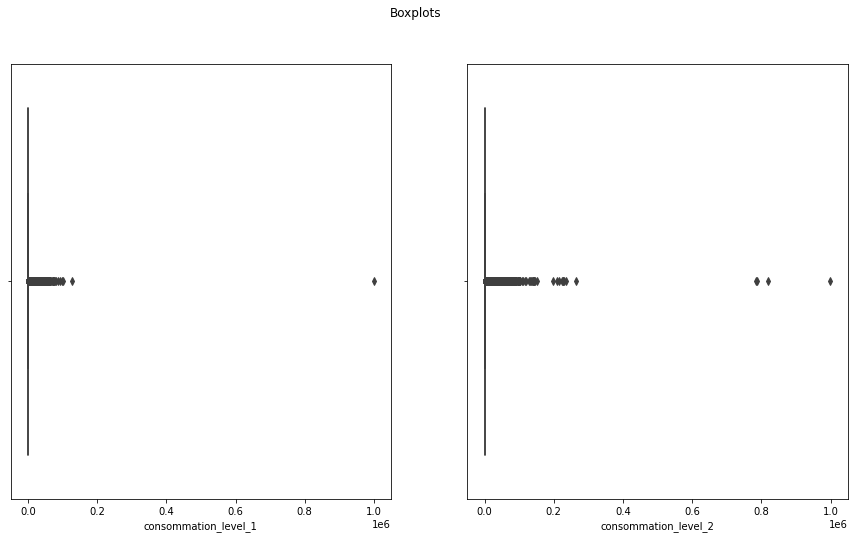

In [ ]:
# Checking for Outliers

fig, axes = plt.subplots(1,2, figsize=(15, 8))
fig.suptitle('Boxplots')
sns.boxplot(df['consommation_level_1'], ax=axes[0])
sns.boxplot(df['consommation_level_2'], ax=axes[1])
plt.show()

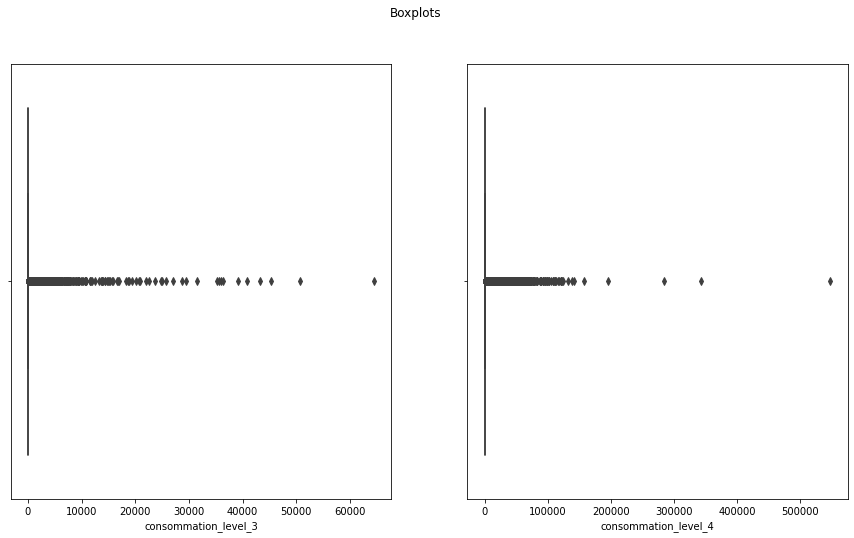

In [ ]:
# Checking for Outliers

fig, axes = plt.subplots(1,2, figsize=(15, 8))
fig.suptitle('Boxplots')
sns.boxplot(df['consommation_level_3'], ax=axes[0])
sns.boxplot(df['consommation_level_4'], ax=axes[1])
plt.show()

In [ ]:
# Checking for Anomalies
#
cateogry_columns=df.select_dtypes(include=['object']).columns.tolist()
for i in cateogry_columns:
  print('\n')
  print(df[i].unique())



['train_Client_0' 'train_Client_1' 'train_Client_10' ...
 'train_Client_99997' 'train_Client_99998' 'train_Client_99999']


['31/12/1994' '29/05/2002' '13/03/1986' ... '16/08/2004' '30/08/1978'
 '25/05/1978']


['2014-03-24' '2013-03-29' '2015-03-23' ... '1995-11-28' '1982-07-04'
 '1996-09-02']


[0 1 5 4 3 2 769 '0' '5' '1' '4' 'A' 618 269375 46 420]


['ELEC' 'GAZ']


In [ ]:
#dropping the columns that have annomalies
# Remove column names 'creation_date',"invoice_date","counter_statue" which has annormalies
df= df.drop(['creation_date',"invoice_date","counter_statue"], axis=1)

### Exploratory Analysis

In [ ]:
#Categorical variables
#Frequecy table for target variable
cls= df["target"].value_counts()
cls
# target: fraud:1 , not fraud: 0 there is class imbalance

0.0    4123637
1.0     353112
Name: target, dtype: int64

In [ ]:
# Print the ratio of fraud cases
ratio_cases = cls/len(df.index)*100
print(f'Ratio of fraudulent cases: {ratio_cases[1]}\nRatio of non-fraudulent cases: {ratio_cases[0]}')

Ratio of fraudulent cases: 7.8876881415509335
Ratio of non-fraudulent cases: 92.11231185844908


In [ ]:
#Categorical variables
df["counter_type"].value_counts()

ELEC    3079406
GAZ     1397343
Name: counter_type, dtype: int64

In [ ]:
#Categorical variables
df["tarif_type"].value_counts()

11    2679872
40    1379755
10     276210
15      72422
45      17552
13      11656
14      11611
12      11345
29      10090
9        6039
21        104
8          43
30         35
24          9
18          4
42          1
27          1
Name: tarif_type, dtype: int64

## Feature Engineering

In [ ]:
df.dtypes

disrict                   int64
client_id                object
client_catg               int64
region                    int64
target                  float64
tarif_type                int64
counter_number            int64
counter_code              int64
reading_remarque          int64
counter_coefficient       int64
consommation_level_1      int64
consommation_level_2      int64
consommation_level_3      int64
consommation_level_4      int64
old_index                 int64
new_index                 int64
months_number             int64
counter_type             object
dtype: object

In [ ]:
#Label Encoding 
from sklearn.preprocessing import LabelEncoder 
en = LabelEncoder()
df['counter_type'] = en.fit_transform(df['counter_type'])
df['client_id'] = en.fit_transform(df['client_id'])


## Solving the class imbalance problem

In [ ]:
#devide dataset into 2 parts , fraud and not fraud
fraud = df[df["target"] == 1.0]
not_fraud  = df[df["target"] == 0.0]
print(fraud.shape)
print(not_fraud.shape)

(353112, 18)
(4123637, 18)


In [ ]:
from sklearn.utils import resample
notfraud_downsaple = resample(not_fraud,
             replace=True,
             n_samples=len(fraud),
             random_state=42)

print(notfraud_downsaple)

         disrict  client_id  client_catg  region  target  tarif_type  \
2408978       69      72926           11     104     0.0          11   
3006474       63      91051           11     306     0.0          40   
2419682       69      73275           11     104     0.0          40   
3814262       62     115530           11     301     0.0          11   
2558701       62      77561           11     307     0.0          11   
...          ...        ...          ...     ...     ...         ...   
2116137       62      64093           11     302     0.0          40   
19402         69        585           11     103     0.0          10   
1416801       62      42725           11     307     0.0          12   
303290        62       9115           11     371     0.0          13   
2929899       62      88777           11     303     0.0          40   

         counter_number  counter_code  reading_remarque  counter_coefficient  \
2408978          343684           207                 9

In [ ]:
# create the final dataset
new_df = pd.concat([notfraud_downsaple, fraud])

print(new_df["target"].value_counts())

0.0    353112
1.0    353112
Name: target, dtype: int64


## Feature Selection

[1.95219509e-02 2.13924697e-01 1.30523356e-02 6.02776423e-02
 1.04949053e-02 2.07689466e-01 3.63065654e-02 1.40121835e-02
 1.23156067e-04 1.14480567e-01 2.32024244e-02 6.87660382e-03
 3.71356424e-03 1.21678074e-01 1.23717446e-01 3.03923043e-02
 5.36113559e-04]


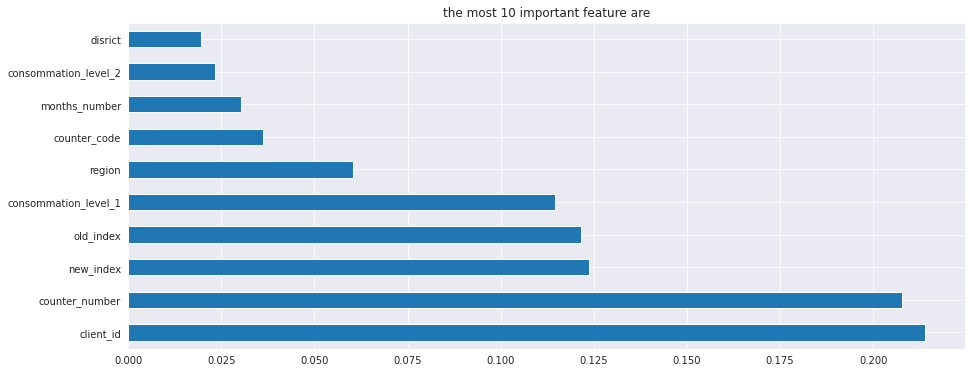

In [ ]:
# Feature Selection
plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")

X = new_df.drop('target', axis=1)
y = new_df['target']

from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X, y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('the most 10 important feature are')
plt.show()

In [ ]:
new_df.columns

Index(['disrict', 'client_id', 'client_catg', 'region', 'target', 'tarif_type',
       'counter_number', 'counter_code', 'reading_remarque',
       'counter_coefficient', 'consommation_level_1', 'consommation_level_2',
       'consommation_level_3', 'consommation_level_4', 'old_index',
       'new_index', 'months_number', 'counter_type'],
      dtype='object')

## Implementing the solution

In [ ]:
#Feature and target

X = new_df.drop(['disrict','consommation_level_2','months_number','target'], axis = 1)
y = new_df['target']

In [ ]:
#Split train and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# Fitting RF classifier to the Training set
rand_forest = RandomForestClassifier()

# Train it on our training set.
rand_forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = rand_forest.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8484477326631031


In [ ]:
cm_rand = confusion_matrix(y_test, y_pred)
cm_rand

array([[59460, 11002],
       [10404, 60379]])

## Extra Tree Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

KeyboardInterrupt: ignored

In [ ]:
cm_ext = confusion_matrix(y_test, y_pred)
cm_ext

## Catboost classifier

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier

clf = CatBoostClassifier()

clf.fit(X_train, y_train)
# Predict based on the model we've trained
y_pred = rand_forest.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 
Learning rate set to 0.154188
0:	learn: 0.6857032	total: 190ms	remaining: 3m 9s
1:	learn: 0.6804757	total: 300ms	remaining: 2m 29s
2:	learn: 0.6764891	total: 418ms	remaining: 2m 18s
3:	learn: 0.6733424	total: 536ms	remaining: 2m 13s
4:	learn: 0.6709958	total: 656ms	remaining: 2m 10s
5:	learn: 0.6691484	total: 767ms	remaining: 2m 7s
6:	learn: 0.6673647	total: 884ms	remaining: 2m 5s
7:	learn: 0.6661834	total: 998ms	remaining: 2m 3s
8:	learn: 0.6647067	total: 1.13s	remaining: 2m 4s
9:	learn: 0.6634567	total: 1.25s	remaining: 2m 3s
10:	learn: 0.6621062	total: 1.37s	remaining: 2m 3s
11:	learn: 0.6613909	total: 1.48s	remaining: 2m 1s
12:	learn: 0.6603695	total: 1.6s	remaining: 2m 1s
13:	learn: 0.6592015	total: 1.73s	remaining: 2m 1s
14:	learn: 0.6583412	total: 1.85s	remaining: 2m 1s
15:	learn: 0.6575022	total: 1.96s	remaining: 2m
16:	lea

In [ ]:
cm_cat = confusion_matrix(y_test, y_pred)
cm_cat

## MLP Classifier

In [ ]:
#Feature and target

X = new_df.drop(['disrict','consommation_level_2','months_number','target'], axis = 1)
y = new_df['target']

#Split train and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
#MLP Classier
from sklearn.neural_network import MLPClassifier
model = MLPClassifier()
model.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = model.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4988919961768558


In [ ]:
cm_mlp = confusion_matrix(y_test, y_pred)
cm_mlp